In [46]:
# Load dataset
import pandas as pd
df = pd.read_csv("HR_comma_sep.csv")
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
10543,0.15,0.92,5,164,3,0,0,0,sales,medium
2304,0.51,0.53,3,201,2,0,0,0,sales,low
11566,0.57,0.55,4,177,8,0,0,0,sales,low
4943,0.55,0.65,3,207,3,0,0,0,technical,low
6317,0.42,0.91,3,209,2,0,0,0,technical,low


In [47]:
# Take avg for all columns to evaluate which attribute affects 'left' more
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From the above table, we can draw that :-
1. Satisfaction_level is low among employees leaving the firm
2. average_monthly_hours is high among employees leaving the firm
3. work_accident less among those leaving the firm
4. promotion_last_5years less among those leaving the firm

<Axes: xlabel='salary', ylabel='left'>

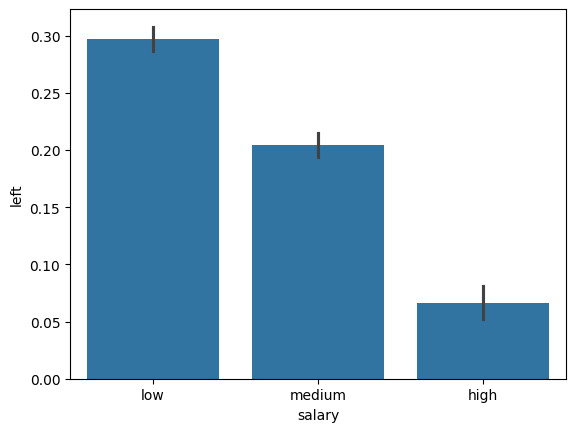

In [38]:
# Salary chart for employee retention
import seaborn as sns
sns.barplot(x="salary", y="left", data=df)

<Axes: xlabel='left', ylabel='Department'>

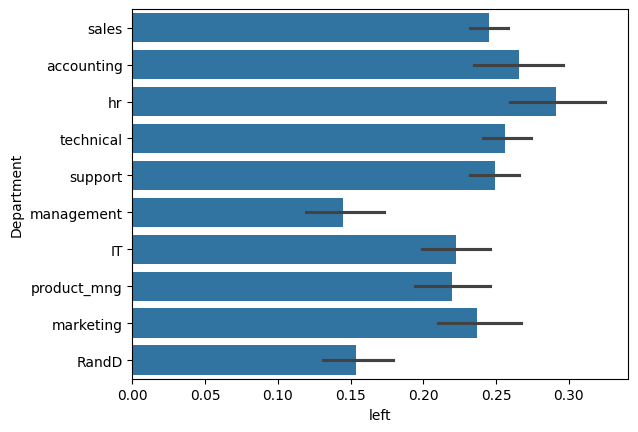

In [39]:
# Department chart for employee retention
sns.barplot(y="Department", x="left", data=df)

In [48]:
# Taking columns which only affect the left column
df = df[['satisfaction_level', 'average_montly_hours', 'Work_accident', 'promotion_last_5years', 'salary', 'left']]
df.sample(5)

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary,left
3754,0.19,154,0,0,high,0
1311,0.39,146,0,0,medium,1
8316,0.50,185,0,0,high,0
12824,0.90,175,0,0,medium,0
3573,0.76,266,0,0,medium,0


In [49]:
# Performing one hot encoding on 'salary' column
df = pd.get_dummies(df, columns=['salary'], drop_first=True)
df.sample(5)

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,left,salary_low,salary_medium
9190,0.55,231,0,0,0,False,True
250,0.79,261,0,0,1,True,False
9354,0.75,139,0,0,0,True,False
11110,0.44,219,0,0,0,True,False
11008,0.92,176,0,0,0,False,True


In [50]:
# train test split
from sklearn.model_selection import train_test_split
X = df.drop("left", axis=1)
Y = df["left"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [52]:
# Applying logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [54]:
# Checking model accuracy
lr.score(X_test, y_test)

0.777

<Axes: >

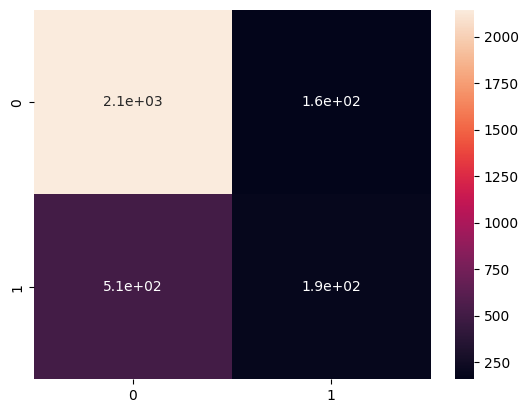

In [55]:
# Plotting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)